In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

In [2]:
df1 = pd.read_csv('tagaytay_luxuryhouses_csv')
df1.head(4)

,Unnamed: 0,bathrooms,bedrooms,rooms_total,building_size,car_spaces,category,furnished,coordinates,location,land_size,price,id,subcategory,year_built,description,link
0,0,5,5,unknown,461,unknown,house,unknown,"[121.0088385,14.260047]",Tagaytay,306,47000000,HO6099E48BC5D1BPH,"[""house"",""single-family-house""]",unknown,"Weather of Baguio, view of tagaytay, heated po...",unknown
1,1,6,5,7,652,3,house,unknown,"[121.2567,14.145351]","Calabuso North, Tagaytay",500,40000000,HO5B98D8B6713D2PH,"[""house"",""single-family-house""]",unknown,OVERLOOKING TAAL LAKE and VOLCANOComplete Hous...,unknown
2,2,5,5,10,1000,6,house,38,"[121.37702,14.143625]","Calabuso, Tagaytay",3152,150000000,NO814HO54NHDINTRESPH,"[""house"",""single-family-house""]",unknown,"House and Lot for Sale with swimming pool, mul...",unknown
3,3,3,5,7,320,2,house,NaN,"[121.0358238,14.1456011]","Calabuso, Tagaytay",485,35000000,NO310HO94LEJINTRESPH,"[""house"",""single-family-house""]",2016,House with pool in Tagaytay Highlands 3br 5tb ...,unknown


In [3]:
df1.isnull().sum()

Unnamed: 0          0
bathrooms           0
bedrooms            0
rooms_total         0
building_size       0
car_spaces          0
category            0
furnished        1124
coordinates         0
location            0
land_size           0
price               0
id                  0
subcategory         0
year_built          0
description         0
link                0
dtype: int64

In [4]:
df1.describe()

,Unnamed: 0
count,3000.000000
mean,1499.500000
std,866.169729
min,0.000000
25%,749.750000
50%,1499.500000
75%,2249.250000
max,2999.000000


In [5]:
df2 = df1.copy(deep=True)

#remove id, unnamed column, and link
df2.drop(columns=["id", "link", "Unnamed: 0", "furnished"], inplace=True, axis=1)
df2

,bathrooms,bedrooms,rooms_total,building_size,car_spaces,category,coordinates,location,land_size,price,subcategory,year_built,description
0,5,5,unknown,461,unknown,house,"[121.0088385,14.260047]",Tagaytay,306,47000000,"[""house"",""single-family-house""]",unknown,"Weather of Baguio, view of tagaytay, heated po..."
1,6,5,7,652,3,house,"[121.2567,14.145351]","Calabuso North, Tagaytay",500,40000000,"[""house"",""single-family-house""]",unknown,OVERLOOKING TAAL LAKE and VOLCANOComplete Hous...
2,5,5,10,1000,6,house,"[121.37702,14.143625]","Calabuso, Tagaytay",3152,150000000,"[""house"",""single-family-house""]",unknown,"House and Lot for Sale with swimming pool, mul..."
3,3,5,7,320,2,house,"[121.0358238,14.1456011]","Calabuso, Tagaytay",485,35000000,"[""house"",""single-family-house""]",2016,House with pool in Tagaytay Highlands 3br 5tb ...
4,11,10,unknown,670,4,house,"[120.9673014,14.1179125]","San Jose, Tagaytay",273,32000000,"[""house"",""single-family-house""]",unknown,Brand newFully furnished10 bedroom all with ow...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,5,5,unknown,500,unknown,house,"[121.04211,14.469863]","Marcelo Green Village, Parañaque",350,35000000,"[""house"",""single-family-house""]",unknown,"Price: Php 35,000,000Lot area: 350 SQM Floor a..."
2996,4,4,unknown,400,unknown,house,"[121.04211,14.469863]","Marcelo Green Village, Parañaque",1131,35000000,"[""house"",""single-family-house""]",unknown,Up for sale is a beautifully renovated 4BR hom...
2997,5,5,5,400,3,house,"[121.04211,14.469863]","Marcelo Green Village, Parañaque",350,35000000,"[""house"",""single-family-house""]",2021,Sophisticated Inviting Brandnew HOUSE and LOT ...
2998,3,4,unknown,370,unknown,house,"[121.04211,14.469863]","Marcelo Green Village, Parañaque",1124,33000000,"[""house"",""single-family-house""]",unknown,The Property4-bedroom home meticulously remode...


In [6]:
df3 = df2[~df2.stack().str.contains("unknown").any(level=0)]
df3.dropna()

C:\Users\USER\AppData\Local\Temp/ipykernel_17068/1914694390.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.any(level=1) should use df.groupby(level=1).any()
  df3 = df2[~df2.stack().str.contains("unknown").any(level=0)]


,bathrooms,bedrooms,rooms_total,building_size,car_spaces,category,coordinates,location,land_size,price,subcategory,year_built,description
3,3,5,7,320,2,house,"[121.0358238,14.1456011]","Calabuso, Tagaytay",485,35000000,"[""house"",""single-family-house""]",2016,House with pool in Tagaytay Highlands 3br 5tb ...
5,6,5,7,612,2,house,"[121.0442602,14.130897]","Calabuso, Tagaytay",1071,49000000,"[""house"",""single-family-house""]",2016,Property DetailsLot area: 1071 sqmFloor room: ...
32,8,8,8,950,4,house,"[120.9621206,14.1152783]","Calabuso North, Tagaytay",1450,75000000,"[""house"",""single-family-house""]",2010,House and Lot Tagaytay Highlands Alta Mira w v...
50,5,5,5,612,2,house,"[121.0233363,14.1414315]","Calabuso North, Tagaytay",1071,50000000,"[""house"",""single-family-house""]",2013,Nestled in the heart of the beautiful and peac...
67,7,7,7,378,3,house,"[121.26831,14.15445]","Dapdap East, Tagaytay",302,35000000,"[""house"",""single-family-house""]",2000,This property is across Tagaytay Ayala Mall ov...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964,4,4,4,500,2,house,"[121.0245799,14.4521766]","B.F. Homes, Parañaque",312,30000000,"[""house"",""single-family-house""]",2021,Airy Brand new modern and elegance finish hous...
2965,4,4,4,500,2,house,"[121.0245799,14.4521766]","B.F. Homes, Parañaque",312,30000000,"[""house"",""single-family-house""]",2021,Airy Brand New Modern and Elegant Finish House...
2967,5,5,4,400,4,house,"[121.0245799,14.4521766]","B.F. Homes, Parañaque",310,38000000,"[""house"",""single-family-house""]",2020,Menlo Park Village BF homes ParanaqueBrand New...
2975,5,5,5,700,5,house,"[120.987483,14.461456]","Pulang Lupa Dos, Las Piñas",403,40000000,"[""house"",""single-family-house""]",2018,Stunning Cittadella Executive Village .It has ...


In [7]:
df3.dropna(axis=0, how='any', inplace=False)

,bathrooms,bedrooms,rooms_total,building_size,car_spaces,category,coordinates,location,land_size,price,subcategory,year_built,description
3,3,5,7,320,2,house,"[121.0358238,14.1456011]","Calabuso, Tagaytay",485,35000000,"[""house"",""single-family-house""]",2016,House with pool in Tagaytay Highlands 3br 5tb ...
5,6,5,7,612,2,house,"[121.0442602,14.130897]","Calabuso, Tagaytay",1071,49000000,"[""house"",""single-family-house""]",2016,Property DetailsLot area: 1071 sqmFloor room: ...
32,8,8,8,950,4,house,"[120.9621206,14.1152783]","Calabuso North, Tagaytay",1450,75000000,"[""house"",""single-family-house""]",2010,House and Lot Tagaytay Highlands Alta Mira w v...
50,5,5,5,612,2,house,"[121.0233363,14.1414315]","Calabuso North, Tagaytay",1071,50000000,"[""house"",""single-family-house""]",2013,Nestled in the heart of the beautiful and peac...
67,7,7,7,378,3,house,"[121.26831,14.15445]","Dapdap East, Tagaytay",302,35000000,"[""house"",""single-family-house""]",2000,This property is across Tagaytay Ayala Mall ov...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964,4,4,4,500,2,house,"[121.0245799,14.4521766]","B.F. Homes, Parañaque",312,30000000,"[""house"",""single-family-house""]",2021,Airy Brand new modern and elegance finish hous...
2965,4,4,4,500,2,house,"[121.0245799,14.4521766]","B.F. Homes, Parañaque",312,30000000,"[""house"",""single-family-house""]",2021,Airy Brand New Modern and Elegant Finish House...
2967,5,5,4,400,4,house,"[121.0245799,14.4521766]","B.F. Homes, Parañaque",310,38000000,"[""house"",""single-family-house""]",2020,Menlo Park Village BF homes ParanaqueBrand New...
2975,5,5,5,700,5,house,"[120.987483,14.461456]","Pulang Lupa Dos, Las Piñas",403,40000000,"[""house"",""single-family-house""]",2018,Stunning Cittadella Executive Village .It has ...


In [8]:
df3.isnull().sum()

bathrooms        0
bedrooms         0
rooms_total      0
building_size    0
car_spaces       0
category         0
coordinates      0
location         0
land_size        0
price            0
subcategory      0
year_built       0
description      0
dtype: int64

In [9]:
df3.describe()

,bathrooms,bedrooms,rooms_total,building_size,car_spaces,category,coordinates,location,land_size,price,subcategory,year_built,description
count,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396
unique,11,7,13,95,10,1,49,27,103,74,3,22,626
top,5,4,5,500,4,house,"[121.0245799,14.4521766]","B.F. Homes, Parañaque",280,30000000,"[""house"",""single-family-house""]",2021,Airy Brand new modern and elegance finish hous...
freq,526,529,551,223,547,1396,523,795,215,206,1366,889,63


In [10]:
df3['location'].tolist()

['Calabuso, Tagaytay',
 'Calabuso, Tagaytay',
 'Calabuso North, Tagaytay',
 'Calabuso North, Tagaytay',
 'Dapdap East, Tagaytay',
 'Iruhin East, Tagaytay',
 'Francisco, Tagaytay',
 'Tolentino East, Tagaytay',
 'Don Jose, Santa Rosa',
 'Don Jose, Santa Rosa',
 'Don Jose, Santa Rosa',
 'Don Jose, Santa Rosa',
 'Don Jose, Santa Rosa',
 'Don Jose, Santa Rosa',
 'Don Jose, Santa Rosa',
 'Canlubang, Calamba',
 'Malitlit, Santa Rosa',
 'Malitlit, Santa Rosa',
 'Malitlit, Santa Rosa',
 'Malitlit, Santa Rosa',
 'Malitlit, Santa Rosa',
 'Malitlit, Santa Rosa',
 'Malitlit, Santa Rosa',
 'Malitlit, Santa Rosa',
 'Malitlit, Santa Rosa',
 'Malitlit, Santa Rosa',
 'Malitlit, Santa Rosa',
 'Malitlit, Santa Rosa',
 'Malitlit, Santa Rosa',
 'Malitlit, Santa Rosa',
 'Malitlit, Santa Rosa',
 'Malitlit, Santa Rosa',
 'Malitlit, Santa Rosa',
 'Malitlit, Santa Rosa',
 'Malitlit, Santa Rosa',
 'Platero, Biñan',
 'San Antonio, San Pedro',
 'Molino I, Bacoor',
 'Calabuso, Tagaytay',
 'Calabuso North, Tagaytay',

In [11]:
df3['location'].replace({"Calabuso, Tagaytay":"Tagaytay", 
                         "Don Jose, Santa Rosa":"Santa Rosa", 
                         "Canlubang, Calamba": "Calamba", 
                         "Malitlit, Santa Rosa": "Santa Rosa", 
                         "Molino I, Bacoor": "Bacoor", 
                         "Poblacion, Muntinlupa": "Muntinlupa", 
                         "Almanza Dos, Las Piñas": "Las Pinas", 
                         "Ayala Alabang, Muntinlupa": "Alabang", 
                         "Pilar, Las Piñas": "Las Pinas", 
                         "Alabang, Muntinlupa": "Alabang", 
                         "Cupang, Muntinlupa": "Muntilupa", 
                         "Maunong, Calamba": "Calamba", 
                         "Almanza Uno, Las Piñas":"Las Pinas", 
                         "Talon Dos, Las Piñas":"Las Pinas", 
                         "B.F. Homes, Parañaque":"BF Homes", 
                         "Puting Lupa, Calamba":"Calamba", 
                         "Marcelo Green Village, Parañaque":"Paranaque", 
                         "Calabuso North, Tagaytay":"Tagaytay", 
                         "Dapdap East, Tagaytay":"Tagaytay", 
                         "Iruhin East, Tagaytay":"Tagaytay", 
                         "Francisco, Tagaytay":"Tagaytay", 
                         "Tolentino East, Tagaytay":"Tagaytay", 
                         "Platero, Biñan":"Binan", 
                         "San Antonio, San Pedro":"San Pedro", 
                         "Quiling, Talisay":"Batangas",
                         "Pansol, Calamba":"Calamba", 
                         "Pulang Lupa Dos, Las Piñas":"Las Pinas"}, inplace=True)
df3

C:\Users\USER\anaconda3\envs\data\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,bathrooms,bedrooms,rooms_total,building_size,car_spaces,category,coordinates,location,land_size,price,subcategory,year_built,description
3,3,5,7,320,2,house,"[121.0358238,14.1456011]",Tagaytay,485,35000000,"[""house"",""single-family-house""]",2016,House with pool in Tagaytay Highlands 3br 5tb ...
5,6,5,7,612,2,house,"[121.0442602,14.130897]",Tagaytay,1071,49000000,"[""house"",""single-family-house""]",2016,Property DetailsLot area: 1071 sqmFloor room: ...
32,8,8,8,950,4,house,"[120.9621206,14.1152783]",Tagaytay,1450,75000000,"[""house"",""single-family-house""]",2010,House and Lot Tagaytay Highlands Alta Mira w v...
50,5,5,5,612,2,house,"[121.0233363,14.1414315]",Tagaytay,1071,50000000,"[""house"",""single-family-house""]",2013,Nestled in the heart of the beautiful and peac...
67,7,7,7,378,3,house,"[121.26831,14.15445]",Tagaytay,302,35000000,"[""house"",""single-family-house""]",2000,This property is across Tagaytay Ayala Mall ov...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964,4,4,4,500,2,house,"[121.0245799,14.4521766]",BF Homes,312,30000000,"[""house"",""single-family-house""]",2021,Airy Brand new modern and elegance finish hous...
2965,4,4,4,500,2,house,"[121.0245799,14.4521766]",BF Homes,312,30000000,"[""house"",""single-family-house""]",2021,Airy Brand New Modern and Elegant Finish House...
2967,5,5,4,400,4,house,"[121.0245799,14.4521766]",BF Homes,310,38000000,"[""house"",""single-family-house""]",2020,Menlo Park Village BF homes ParanaqueBrand New...
2975,5,5,5,700,5,house,"[120.987483,14.461456]",Las Pinas,403,40000000,"[""house"",""single-family-house""]",2018,Stunning Cittadella Executive Village .It has ...


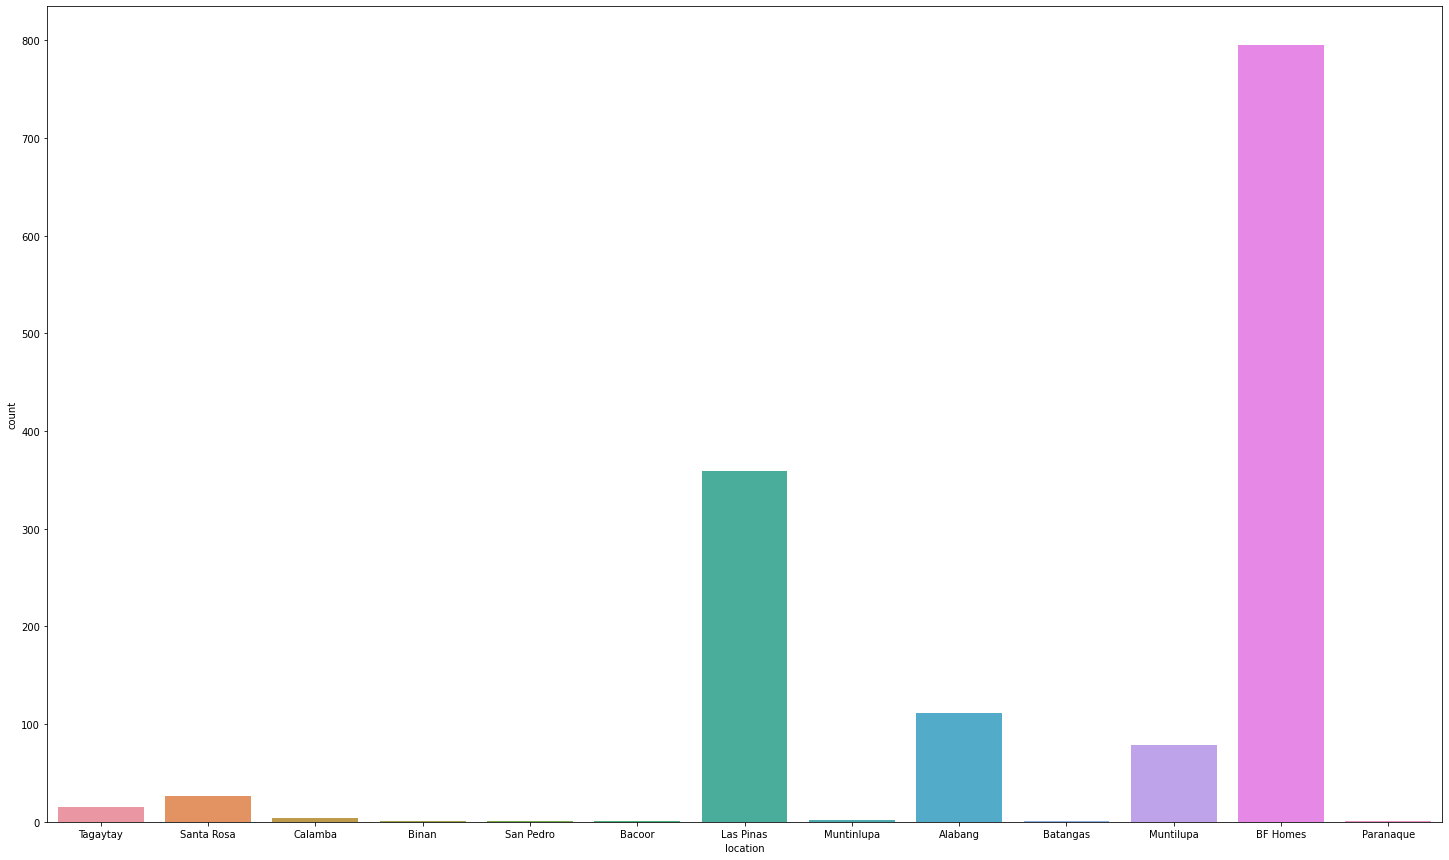

In [12]:
#plot location to check

p = sns.countplot(x=df3['location'])
plt.gcf().set_size_inches(25,15)


In [13]:
#Clean furnished this time
df4 = df3.copy(deep=True)
df5 = df4.dropna(axis=0, how='any', inplace=False)
df5

,bathrooms,bedrooms,rooms_total,building_size,car_spaces,category,coordinates,location,land_size,price,subcategory,year_built,description
3,3,5,7,320,2,house,"[121.0358238,14.1456011]",Tagaytay,485,35000000,"[""house"",""single-family-house""]",2016,House with pool in Tagaytay Highlands 3br 5tb ...
5,6,5,7,612,2,house,"[121.0442602,14.130897]",Tagaytay,1071,49000000,"[""house"",""single-family-house""]",2016,Property DetailsLot area: 1071 sqmFloor room: ...
32,8,8,8,950,4,house,"[120.9621206,14.1152783]",Tagaytay,1450,75000000,"[""house"",""single-family-house""]",2010,House and Lot Tagaytay Highlands Alta Mira w v...
50,5,5,5,612,2,house,"[121.0233363,14.1414315]",Tagaytay,1071,50000000,"[""house"",""single-family-house""]",2013,Nestled in the heart of the beautiful and peac...
67,7,7,7,378,3,house,"[121.26831,14.15445]",Tagaytay,302,35000000,"[""house"",""single-family-house""]",2000,This property is across Tagaytay Ayala Mall ov...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964,4,4,4,500,2,house,"[121.0245799,14.4521766]",BF Homes,312,30000000,"[""house"",""single-family-house""]",2021,Airy Brand new modern and elegance finish hous...
2965,4,4,4,500,2,house,"[121.0245799,14.4521766]",BF Homes,312,30000000,"[""house"",""single-family-house""]",2021,Airy Brand New Modern and Elegant Finish House...
2967,5,5,4,400,4,house,"[121.0245799,14.4521766]",BF Homes,310,38000000,"[""house"",""single-family-house""]",2020,Menlo Park Village BF homes ParanaqueBrand New...
2975,5,5,5,700,5,house,"[120.987483,14.461456]",Las Pinas,403,40000000,"[""house"",""single-family-house""]",2018,Stunning Cittadella Executive Village .It has ...


In [14]:
df6 = df5.drop([5])
df6

,bathrooms,bedrooms,rooms_total,building_size,car_spaces,category,coordinates,location,land_size,price,subcategory,year_built,description
3,3,5,7,320,2,house,"[121.0358238,14.1456011]",Tagaytay,485,35000000,"[""house"",""single-family-house""]",2016,House with pool in Tagaytay Highlands 3br 5tb ...
32,8,8,8,950,4,house,"[120.9621206,14.1152783]",Tagaytay,1450,75000000,"[""house"",""single-family-house""]",2010,House and Lot Tagaytay Highlands Alta Mira w v...
50,5,5,5,612,2,house,"[121.0233363,14.1414315]",Tagaytay,1071,50000000,"[""house"",""single-family-house""]",2013,Nestled in the heart of the beautiful and peac...
67,7,7,7,378,3,house,"[121.26831,14.15445]",Tagaytay,302,35000000,"[""house"",""single-family-house""]",2000,This property is across Tagaytay Ayala Mall ov...
69,2,3,3,207,2,house,"[121.0133973,14.1388739]",Tagaytay,639,44956000,"[""house"",""single-family-house""]",2018,Own a Lucerne ready home. It is a 207-square m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964,4,4,4,500,2,house,"[121.0245799,14.4521766]",BF Homes,312,30000000,"[""house"",""single-family-house""]",2021,Airy Brand new modern and elegance finish hous...
2965,4,4,4,500,2,house,"[121.0245799,14.4521766]",BF Homes,312,30000000,"[""house"",""single-family-house""]",2021,Airy Brand New Modern and Elegant Finish House...
2967,5,5,4,400,4,house,"[121.0245799,14.4521766]",BF Homes,310,38000000,"[""house"",""single-family-house""]",2020,Menlo Park Village BF homes ParanaqueBrand New...
2975,5,5,5,700,5,house,"[120.987483,14.461456]",Las Pinas,403,40000000,"[""house"",""single-family-house""]",2018,Stunning Cittadella Executive Village .It has ...


In [33]:
df7 = df6.copy(deep=True)

In [15]:
#Clean subcategory
#https://machinelearningmastery.com/clean-text-machine-learning-python/

In [53]:
#punctuation
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df7['description1'] = df7['description'].apply(lambda x: remove_punct(x))

#tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

df7['subcategory1'] = df7['subcategory'].apply(lambda x: tokenization(x.lower()))
df7['description2'] = df7['description1'].apply(lambda x: tokenization(x.lower()))

#remove stopwords
stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
df7['description3'] = df7['description2'].apply(lambda x: remove_stopwords(x))


df7

,bathrooms,bedrooms,rooms_total,building_size,car_spaces,category,coordinates,location,land_size,price,subcategory,year_built,description,subcategory1,description1,subcategory2,description2,subcategory3,description3,description4
3,3,5,7,320,2,house,"[121.0358238,14.1456011]",Tagaytay,485,35000000,"[""house"",""single-family-house""]",2016,House with pool in Tagaytay Highlands 3br 5tb ...,"[, house, single, family, house, ]",House with pool in Tagaytay Highlands br tb re...,[housesinglefamilyhouse],"[house, with, pool, in, tagaytay, highlands, b...",[housesinglefamilyhouse],"[house, pool, tagaytay, highlands, br, tb, res...",[housepooltagaytayhighlandsbrtbresalevillagehi...
32,8,8,8,950,4,house,"[120.9621206,14.1152783]",Tagaytay,1450,75000000,"[""house"",""single-family-house""]",2010,House and Lot Tagaytay Highlands Alta Mira w v...,"[, house, single, family, house, ]",House and Lot Tagaytay Highlands Alta Mira w v...,[housesinglefamilyhouse],"[house, and, lot, tagaytay, highlands, alta, m...",[housesinglefamilyhouse],"[house, lot, tagaytay, highlands, alta, mira, ...",[houselottagaytayhighlandsaltamirawviewperfect...
50,5,5,5,612,2,house,"[121.0233363,14.1414315]",Tagaytay,1071,50000000,"[""house"",""single-family-house""]",2013,Nestled in the heart of the beautiful and peac...,"[, house, single, family, house, ]",Nestled in the heart of the beautiful and peac...,[housesinglefamilyhouse],"[nestled, in, the, heart, of, the, beautiful, ...",[housesinglefamilyhouse],"[nestled, heart, beautiful, peaceful, tagaytay...",[nestledheartbeautifulpeacefultagaytayhighland...
67,7,7,7,378,3,house,"[121.26831,14.15445]",Tagaytay,302,35000000,"[""house"",""single-family-house""]",2000,This property is across Tagaytay Ayala Mall ov...,"[, house, single, family, house, ]",This property is across Tagaytay Ayala Mall ov...,[housesinglefamilyhouse],"[this, property, is, across, tagaytay, ayala, ...",[housesinglefamilyhouse],"[property, across, tagaytay, ayala, mall, over...",[propertyacrosstagaytayayalamalloverlookingtaa...
69,2,3,3,207,2,house,"[121.0133973,14.1388739]",Tagaytay,639,44956000,"[""house"",""single-family-house""]",2018,Own a Lucerne ready home. It is a 207-square m...,"[, house, single, family, house, ]",Own a Lucerne ready home It is a square meter ...,[housesinglefamilyhouse],"[own, a, lucerne, ready, home, it, is, a, squa...",[housesinglefamilyhouse],"[lucerne, ready, home, square, meter, uphill, ...",[lucernereadyhomesquaremeteruphillmodelswissin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964,4,4,4,500,2,house,"[121.0245799,14.4521766]",BF Homes,312,30000000,"[""house"",""single-family-house""]",2021,Airy Brand new modern and elegance finish hous...,"[, house, single, family, house, ]",Airy Brand new modern and elegance finish hous...,[housesinglefamilyhouse],"[airy, brand, new, modern, and, elegance, fini...",[housesinglefamilyhouse],"[airy, brand, new, modern, elegance, finish, h...",[airybrandnewmodernelegancefinishhouselotsaleb...
2965,4,4,4,500,2,house,"[121.0245799,14.4521766]",BF Homes,312,30000000,"[""house"",""single-family-house""]",2021,Airy Brand New Modern and Elegant Finish House...,"[, house, single, family, house, ]",Airy Brand New Modern and Elegant Finish House...,[housesinglefamilyhouse],"[airy, brand, new, modern, and, elegant, finis...",[housesinglefamilyhouse],"[airy, brand, new, modern, elegant, finish, ho...",[airybrandnewmodernelegantfinishhouselotsalebf...
2967,5,5,4,400,4,house,"[121.0245799,14.4521766]",BF Homes,310,38000000,"[""house"",""single-family-house""]",2020,Menlo Park Village BF homes ParanaqueBrand New...,"[, house, single, family, house, ]",Menlo Park Village BF homes ParanaqueBrand New...,[housesinglefamilyhouse],"[menlo, park, village, bf, homes, paranaquebra...",[housesinglefamilyhouse],"[menlo, park, village, bf, homes, paranaquebra...",[menloparkvillagebfhomesparanaquebrandnewstore...
2975,5,5,5,700,5,house,"[120.987483,14.461456]",Las 

In [52]:
#desc3 is optimal

def clean_text(text):
    text_lc = ''.join([word.lower() for word in text if word not in string.punctuation])
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

df7['description4'] = df7['description3'].apply(lambda x: clean_text(x))
df7


,bathrooms,bedrooms,rooms_total,building_size,car_spaces,category,coordinates,location,land_size,price,subcategory,year_built,description,subcategory1,description1,subcategory2,description2,subcategory3,description3,description4
3,3,5,7,320,2,house,"[121.0358238,14.1456011]",Tagaytay,485,35000000,"[""house"",""single-family-house""]",2016,House with pool in Tagaytay Highlands 3br 5tb ...,"[, house, single, family, house, ]",House with pool in Tagaytay Highlands br tb re...,[housesinglefamilyhouse],"[house, with, pool, in, tagaytay, highlands, b...",[housesinglefamilyhouse],"[house, pool, tagaytay, highlands, br, tb, res...",[housepooltagaytayhighlandsbrtbresalevillagehi...
32,8,8,8,950,4,house,"[120.9621206,14.1152783]",Tagaytay,1450,75000000,"[""house"",""single-family-house""]",2010,House and Lot Tagaytay Highlands Alta Mira w v...,"[, house, single, family, house, ]",House and Lot Tagaytay Highlands Alta Mira w v...,[housesinglefamilyhouse],"[house, and, lot, tagaytay, highlands, alta, m...",[housesinglefamilyhouse],"[house, lot, tagaytay, highlands, alta, mira, ...",[houselottagaytayhighlandsaltamirawviewperfect...
50,5,5,5,612,2,house,"[121.0233363,14.1414315]",Tagaytay,1071,50000000,"[""house"",""single-family-house""]",2013,Nestled in the heart of the beautiful and peac...,"[, house, single, family, house, ]",Nestled in the heart of the beautiful and peac...,[housesinglefamilyhouse],"[nestled, in, the, heart, of, the, beautiful, ...",[housesinglefamilyhouse],"[nestled, heart, beautiful, peaceful, tagaytay...",[nestledheartbeautifulpeacefultagaytayhighland...
67,7,7,7,378,3,house,"[121.26831,14.15445]",Tagaytay,302,35000000,"[""house"",""single-family-house""]",2000,This property is across Tagaytay Ayala Mall ov...,"[, house, single, family, house, ]",This property is across Tagaytay Ayala Mall ov...,[housesinglefamilyhouse],"[this, property, is, across, tagaytay, ayala, ...",[housesinglefamilyhouse],"[property, across, tagaytay, ayala, mall, over...",[propertyacrosstagaytayayalamalloverlookingtaa...
69,2,3,3,207,2,house,"[121.0133973,14.1388739]",Tagaytay,639,44956000,"[""house"",""single-family-house""]",2018,Own a Lucerne ready home. It is a 207-square m...,"[, house, single, family, house, ]",Own a Lucerne ready home It is a square meter ...,[housesinglefamilyhouse],"[own, a, lucerne, ready, home, it, is, a, squa...",[housesinglefamilyhouse],"[lucerne, ready, home, square, meter, uphill, ...",[lucernereadyhomesquaremeteruphillmodelswissin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964,4,4,4,500,2,house,"[121.0245799,14.4521766]",BF Homes,312,30000000,"[""house"",""single-family-house""]",2021,Airy Brand new modern and elegance finish hous...,"[, house, single, family, house, ]",Airy Brand new modern and elegance finish hous...,[housesinglefamilyhouse],"[airy, brand, new, modern, and, elegance, fini...",[housesinglefamilyhouse],"[airy, brand, new, modern, elegance, finish, h...",[airybrandnewmodernelegancefinishhouselotsaleb...
2965,4,4,4,500,2,house,"[121.0245799,14.4521766]",BF Homes,312,30000000,"[""house"",""single-family-house""]",2021,Airy Brand New Modern and Elegant Finish House...,"[, house, single, family, house, ]",Airy Brand New Modern and Elegant Finish House...,[housesinglefamilyhouse],"[airy, brand, new, modern, and, elegant, finis...",[housesinglefamilyhouse],"[airy, brand, new, modern, elegant, finish, ho...",[airybrandnewmodernelegantfinishhouselotsalebf...
2967,5,5,4,400,4,house,"[121.0245799,14.4521766]",BF Homes,310,38000000,"[""house"",""single-family-house""]",2020,Menlo Park Village BF homes ParanaqueBrand New...,"[, house, single, family, house, ]",Menlo Park Village BF homes ParanaqueBrand New...,[housesinglefamilyhouse],"[menlo, park, village, bf, homes, paranaquebra...",[housesinglefamilyhouse],"[menlo, park, village, bf, homes, paranaquebra...",[menloparkvillagebfhomesparanaquebrandnewstore...
2975,5,5,5,700,5,house,"[120.987483,14.461456]",Las 

In [54]:
df8 = df7.copy(deep=True)

In [59]:
df9 = df8['subcategory1'].str.get_dummies(sep=',')
df10 = pd.concat([df8, df9], axis=1)
df10


,bathrooms,bedrooms,rooms_total,building_size,car_spaces,category,coordinates,location,land_size,price,...,subcategory3,description3,description4,''],'family','house','single','townhouse','villas',[''
3,3,5,7,320,2,house,"[121.0358238,14.1456011]",Tagaytay,485,35000000,...,[housesinglefamilyhouse],"[house, pool, tagaytay, highlands, br, tb, res...",[housepooltagaytayhighlandsbrtbresalevillagehi...,1,1,1,1,0,0,1
32,8,8,8,950,4,house,"[120.9621206,14.1152783]",Tagaytay,1450,75000000,...,[housesinglefamilyhouse],"[house, lot, tagaytay, highlands, alta, mira, ...",[houselottagaytayhighlandsaltamirawviewperfect...,1,1,1,1,0,0,1
50,5,5,5,612,2,house,"[121.0233363,14.1414315]",Tagaytay,1071,50000000,...,[housesinglefamilyhouse],"[nestled, heart, beautiful, peaceful, tagaytay...",[nestledheartbeautifulpeacefultagaytayhighland...,1,1,1,1,0,0,1
67,7,7,7,378,3,house,"[121.26831,14.15445]",Tagaytay,302,35000000,...,[housesinglefamilyhouse],"[property, across, tagaytay, ayala, mall, over...",[propertyacrosstagaytayayalamalloverlookingtaa...,1,1,1,1,0,0,1
69,2,3,3,207,2,house,"[121.0133973,14.1388739]",Tagaytay,639,44956000,...,[housesinglefamilyhouse],"[lucerne, ready, home, square, meter, uphill, ...",[lucernereadyhomesquaremeteruphillmodelswissin...,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964,4,4,4,500,2,house,"[121.0245799,14.4521766]",BF Homes,312,30000000,...,[housesinglefamilyhouse],"[airy, brand, new, modern, elegance, finish, h...",[airybrandnewmodernelegancefinishhouselotsaleb...,1,1,1,1,0,0,1
2965,4,4,4,500,2,house,"[121.0245799,14.4521766]",BF Homes,312,30000000,...,[housesinglefamilyhouse],"[airy, brand, new, modern, elegant, finish, ho...",[airybrandnewmodernelegantfinishhouselotsalebf...,1,1,1,1,0,0,1
2967,5,5,4,400,4,house,"[121.0245799,14.4521766]",BF Homes,310,38000000,...,[housesinglefamilyhouse],"[menlo, park, village, bf, homes, paranaquebra...",[menloparkvillagebfhomesparanaquebrandnewstore...,1,1,1,1,0,0,1
2975,5,5,5,700,5,house,"[120.987483,14.461456]",Las Pinas,403,40000000,...,[housesinglefamilyhouse],"[stunning, cittadella, executive, village, bed...",[stunningcittadellaexecutivevillagebedroomslar...,1,1,1,1,0,0,1


In [79]:
df11 = df10.copy(deep=True)
df11.drop(columns=['subcategory3', 'subcategory2', 'description2', 'description4'])


,bathrooms,bedrooms,rooms_total,building_size,car_spaces,category,coordinates,location,land_size,price,...,subcategory1,description1,description3,''],'family','house','single','townhouse','villas',[''
3,3,5,7,320,2,house,"[121.0358238,14.1456011]",Tagaytay,485,35000000,...,"[, house, single, family, house, ]",House with pool in Tagaytay Highlands br tb re...,"[house, pool, tagaytay, highlands, br, tb, res...",1,1,1,1,0,0,1
32,8,8,8,950,4,house,"[120.9621206,14.1152783]",Tagaytay,1450,75000000,...,"[, house, single, family, house, ]",House and Lot Tagaytay Highlands Alta Mira w v...,"[house, lot, tagaytay, highlands, alta, mira, ...",1,1,1,1,0,0,1
50,5,5,5,612,2,house,"[121.0233363,14.1414315]",Tagaytay,1071,50000000,...,"[, house, single, family, house, ]",Nestled in the heart of the beautiful and peac...,"[nestled, heart, beautiful, peaceful, tagaytay...",1,1,1,1,0,0,1
67,7,7,7,378,3,house,"[121.26831,14.15445]",Tagaytay,302,35000000,...,"[, house, single, family, house, ]",This property is across Tagaytay Ayala Mall ov...,"[property, across, tagaytay, ayala, mall, over...",1,1,1,1,0,0,1
69,2,3,3,207,2,house,"[121.0133973,14.1388739]",Tagaytay,639,44956000,...,"[, house, single, family, house, ]",Own a Lucerne ready home It is a square meter ...,"[lucerne, ready, home, square, meter, uphill, ...",1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964,4,4,4,500,2,house,"[121.0245799,14.4521766]",BF Homes,312,30000000,...,"[, house, single, family, house, ]",Airy Brand new modern and elegance finish hous...,"[airy, brand, new, modern, elegance, finish, h...",1,1,1,1,0,0,1
2965,4,4,4,500,2,house,"[121.0245799,14.4521766]",BF Homes,312,30000000,...,"[, house, single, family, house, ]",Airy Brand New Modern and Elegant Finish House...,"[airy, brand, new, modern, elegant, finish, ho...",1,1,1,1,0,0,1
2967,5,5,4,400,4,house,"[121.0245799,14.4521766]",BF Homes,310,38000000,...,"[, house, single, family, house, ]",Menlo Park Village BF homes ParanaqueBrand New...,"[menlo, park, village, bf, homes, paranaquebra...",1,1,1,1,0,0,1
2975,5,5,5,700,5,house,"[120.987483,14.461456]",Las Pinas,403,40000000,...,"[, house, single, family, house, ]",Stunning Cittadella Executive Village It has ...,"[stunning, cittadella, executive, village, bed...",1,1,1,1,0,0,1


In [90]:
#clean the unecessary column
cols = [20, 25]
df11.drop(df11.columns[cols], axis=1, inplace=True)

IndexError: index 25 is out of bounds for axis 0 with size 25

In [96]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 3 to 2997
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   bathrooms      1395 non-null   object
 1   bedrooms       1395 non-null   object
 2   rooms_total    1395 non-null   object
 3   building_size  1395 non-null   object
 4   car_spaces     1395 non-null   object
 5   category       1395 non-null   object
 6   coordinates    1395 non-null   object
 7   location       1395 non-null   object
 8   land_size      1395 non-null   object
 9   price          1395 non-null   object
 10  subcategory    1395 non-null   object
 11  year_built     1395 non-null   object
 12  description    1395 non-null   object
 13  subcategory1   1395 non-null   object
 14  description1   1395 non-null   object
 15  subcategory2   1395 non-null   object
 16  description2   1395 non-null   object
 17  subcategory3   1395 non-null   object
 18  description3   1395 non-null

In [110]:
df11.to_csv('df11_clean', index=False, encoding='utf-8')

In [114]:
readfile = pd.read_csv('df11_clean')
readfile.to_excel(r'C:\Users\USER\DS Projects\Lamudi\df11_clean.xlsx', index = None, header=True)